In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#opening dataset initalised with y = 1.48x + 0.25
clean_signal = pd.read_csv("C:\\Users\\L Gokulnath\\Documents\\data_pclub.csv")
clean_signal.head()

,X,Y
0,0,0.25
1,1,1.73
2,2,3.21
3,3,4.69
4,4,6.17


In [57]:
mu, sigma = 0, 0.5
noise = np.random.normal(mu, sigma, [101,2]) 
print(noise)

[[-0.24482211  0.00287141]
 [-0.13566604  0.53368262]
 [ 0.36954889  0.24044688]
 [-0.32657129 -0.33932738]
 [ 0.7603468  -0.11649061]
 [ 0.10661246  0.01136144]
 [-0.10881277  0.01898731]
 [-0.26819918 -0.55068746]
 [-0.04567757  0.55767553]
 [-0.03658498  1.08482521]
 [ 0.18397605  0.33370118]
 [ 0.2768225   0.22332635]
 [-0.02541173  0.16676387]
 [-0.34632197 -0.45161038]
 [-0.5662757  -0.22835542]
 [ 0.15399792 -0.00924496]
 [ 0.91734209 -0.59511754]
 [-0.27720936  0.14044892]
 [-0.3337176  -0.65295861]
 [-0.16282448 -0.72980267]
 [ 0.02251541 -0.38560357]
 [ 0.98008854  0.08610879]
 [-0.71295818  0.13657535]
 [-0.70777547 -0.56760054]
 [ 0.21363551  0.84067737]
 [ 0.10304811 -0.91994319]
 [ 0.11179019 -0.03501933]
 [-0.14930566  0.06985006]
 [ 0.38095445  0.34176658]
 [-0.52732518  0.15457179]
 [ 0.58616602 -0.35894881]
 [-0.14937432 -0.20579079]
 [ 0.52294052  0.9616337 ]
 [ 0.39190649  1.00056304]
 [ 0.6361405  -0.60793011]
 [-0.85056039  0.0318323 ]
 [ 0.17903941  0.45785995]
 

In [58]:
signal = clean_signal + noise
signal

,X,Y
0,-0.244822,0.252871
1,0.864334,2.263683
2,2.369549,3.450447
3,2.673429,4.350673
4,4.760347,6.053509
...,...,...
96,95.825874,142.745274
97,96.811917,144.597812
98,98.307153,144.807669
99,98.856112,146.536566


In [59]:
signal.to_csv("C:\\Users\\L Gokulnath\\Documents\\data_final.csv", index=False)

In [60]:
df = pd.read_csv("C:\\Users\\L Gokulnath\\Documents\\data_final.csv")
df

,X,Y
0,-0.244822,0.252871
1,0.864334,2.263683
2,2.369549,3.450447
3,2.673429,4.350673
4,4.760347,6.053509
...,...,...
96,95.825874,142.745274
97,96.811917,144.597812
98,98.307153,144.807669
99,98.856112,146.536566


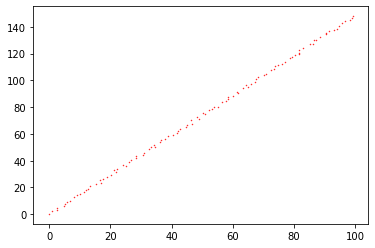

In [65]:
plt.scatter(df.X, df.Y, color= 'red',s=0.2, marker = 'o')
plt.show()

In [62]:
# gradient descent for minimising mean absolute error function
def gradient_descent(x, y):
    m_curr = b_curr = 0
    iterations = 1000
    n = len(x)
    learning_rate = 0.0001
    #code for mean absolute error loss function
    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([abs(val) for val in (y-y_predicted)])
        md = bd = 0
        for j in range(n):
            val = y[j] - y_predicted[j]
            if val > 0:
                md = md - x[j]
                bd = -1
            else:
                md = md + x[j]
                bd = +1
        md = md/n
        bd = bd/n
                
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))
    return m_curr, b_curr

x = df.X
y = df.Y

m , b = gradient_descent(x,y)

m 0.005001646420436805, b 9.900990099009902e-07, cost 74.27601304210171 iteration 0
m 0.01000329284087361, b 1.9801980198019803e-06, cost 74.02584738285202 iteration 1
m 0.015004939261310416, b 2.9702970297029707e-06, cost 73.7756817236023 iteration 2
m 0.02000658568174722, b 3.960396039603961e-06, cost 73.52551606435262 iteration 3
m 0.025008232102184027, b 4.950495049504951e-06, cost 73.27535040510293 iteration 4
m 0.030009878522620832, b 5.940594059405941e-06, cost 73.02518474585322 iteration 5
m 0.035011524943057634, b 6.930693069306931e-06, cost 72.77501908660356 iteration 6
m 0.04001317136349444, b 7.920792079207921e-06, cost 72.52485342735385 iteration 7
m 0.04501481778393125, b 8.910891089108911e-06, cost 72.27468776810417 iteration 8
m 0.05001646420436806, b 9.900990099009901e-06, cost 72.02452210885444 iteration 9
m 0.05501811062480487, b 1.0891089108910891e-05, cost 71.77435644960475 iteration 10
m 0.06001975704524168, b 1.1881188118811881e-05, cost 71.5241907903551 iteratio

m 1.4845155678673019, b 0.00030297029702970493, cost 0.7181934519178642 iteration 305
m 1.484720806367731, b 0.00030396039603960593, cost 0.7173072533901323 iteration 306
m 1.4849260448681603, b 0.00030495049504950693, cost 0.7168859171369826 iteration 307
m 1.4851312833685895, b 0.00030594059405940794, cost 0.7164645808838341 iteration 308
m 1.4853015391316, b 0.00030693069306930894, cost 0.7160435059303123 iteration 309
m 1.4854717948946106, b 0.00030792079207920994, cost 0.7157535474552846 iteration 310
m 1.4856420506576211, b 0.00030891089108911094, cost 0.715463588980257 iteration 311
m 1.4857899760790534, b 0.00030990099009901194, cost 0.7151796554495118 iteration 312
m 1.4859379015004857, b 0.00031089108910891295, cost 0.714960767525728 iteration 313
m 1.486085826921918, b 0.00031188118811881395, cost 0.7147418796019457 iteration 314
m 1.4862337523433502, b 0.00031287128712871495, cost 0.7145229916781631 iteration 315
m 1.4863816777647825, b 0.00031386138613861595, cost 0.714304

m 1.486807503948368, b 0.00041584158415841914, cost 0.7136023822407181 iteration 419
m 1.486767954784687, b 0.00041683168316832014, cost 0.713586691862437 iteration 420
m 1.4867284056210062, b 0.00041782178217822114, cost 0.7135710014841554 iteration 421
m 1.4868763310424384, b 0.00041881188118812214, cost 0.7135651120120923 iteration 422
m 1.4868367818787576, b 0.00041980198019802315, cost 0.7136137653581194 iteration 423
m 1.4867972327150767, b 0.00042079207920792415, cost 0.7135980749798391 iteration 424
m 1.4867576835513958, b 0.00042178217821782515, cost 0.7135823846015574 iteration 425
m 1.486718134387715, b 0.00042277227722772615, cost 0.7135666942232767 iteration 426
m 1.4868660598091472, b 0.00042376237623762715, cost 0.7135799626736069 iteration 427
m 1.4868265106454663, b 0.00042475247524752815, cost 0.7136094580972409 iteration 428
m 1.4867869614817855, b 0.00042574257425742916, cost 0.7135937677189604 iteration 429
m 1.4867474123181046, b 0.00042673267326733016, cost 0.713

m 1.4867484689344916, b 0.0005346534653465369, cost 0.7135731526101559 iteration 539
m 1.4867089197708108, b 0.0005356435643564378, cost 0.7135574622318736 iteration 540
m 1.486856845192243, b 0.0005366336633663388, cost 0.7135857706720223 iteration 541
m 1.4868172960285622, b 0.0005376237623762397, cost 0.7136002261058382 iteration 542
m 1.4867777468648813, b 0.0005386138613861407, cost 0.7135845357275565 iteration 543
m 1.4867381977012004, b 0.0005396039603960416, cost 0.7135688453492744 iteration 544
m 1.4866986485375195, b 0.0005405940594059425, cost 0.7135531549709944 iteration 545
m 1.4868465739589518, b 0.0005415841584158435, cost 0.7136006213335371 iteration 546
m 1.486807024795271, b 0.0005425742574257444, cost 0.7135959188449591 iteration 547
m 1.48676747563159, b 0.0005435643564356454, cost 0.713580228466678 iteration 548
m 1.4867279264679092, b 0.0005445544554455463, cost 0.7135645380883967 iteration 549
m 1.4868758518893415, b 0.0005455445544554473, cost 0.7135570373487271

m 1.4867012409233906, b 0.0006297029702970278, cost 0.7135497689057043 iteration 635
m 1.486849166344823, b 0.0006306930693069288, cost 0.7135906106707017 iteration 636
m 1.486809617181142, b 0.0006316831683168297, cost 0.7135925327796683 iteration 637
m 1.4867700680174611, b 0.0006326732673267307, cost 0.7135768424013874 iteration 638
m 1.4867305188537803, b 0.0006336633663366316, cost 0.7135611520231062 iteration 639
m 1.4868784442752125, b 0.0006346534653465326, cost 0.7135470266858905 iteration 640
m 1.4868388951115317, b 0.0006356435643564335, cost 0.7136039158970697 iteration 641
m 1.4867993459478508, b 0.0006366336633663345, cost 0.7135882255187891 iteration 642
m 1.48675979678417, b 0.0006376237623762354, cost 0.7135725351405083 iteration 643
m 1.486720247620489, b 0.0006386138613861364, cost 0.7135568447622267 iteration 644
m 1.4868681730419213, b 0.0006396039603960373, cost 0.7135618773474063 iteration 645
m 1.4868286238782404, b 0.0006405940594059383, cost 0.7135996086361918

m 1.4867798600976554, b 0.0007544554455445472, cost 0.7135746862665069 iteration 761
m 1.4867403109339745, b 0.0007554455445544482, cost 0.7135589958882255 iteration 762
m 1.4867007617702936, b 0.0007564356435643491, cost 0.7135433055099447 iteration 763
m 1.486848687191726, b 0.0007574257425742501, cost 0.7135825360073363 iteration 764
m 1.486809138028045, b 0.000758415841584151, cost 0.7135860693839098 iteration 765
m 1.4867695888643642, b 0.000759405940594052, cost 0.7135703790056284 iteration 766
m 1.4867300397006833, b 0.0007603960396039529, cost 0.7135546886273471 iteration 767
m 1.4866904905370024, b 0.0007613861386138539, cost 0.7135389982490661 iteration 768
m 1.4868384159584347, b 0.0007623762376237548, cost 0.713597386668852 iteration 769
m 1.4867988667947538, b 0.0007633663366336558, cost 0.7135817621230304 iteration 770
m 1.486759317631073, b 0.0007643564356435567, cost 0.7135660717447493 iteration 771
m 1.486719768467392, b 0.0007653465346534577, cost 0.7135503813664678 i

m 1.4867793809445584, b 0.0008811881188118685, cost 0.7135682228707481 iteration 889
m 1.4867398317808775, b 0.0008821782178217695, cost 0.713552532492466 iteration 890
m 1.4867002826171967, b 0.0008831683168316704, cost 0.7135368421141858 iteration 891
m 1.486848208038629, b 0.0008841584158415714, cost 0.7135744613439716 iteration 892
m 1.486808658874948, b 0.0008851485148514723, cost 0.7135796059881502 iteration 893
m 1.4867691097112672, b 0.0008861386138613733, cost 0.7135639156098691 iteration 894
m 1.4867295605475863, b 0.0008871287128712742, cost 0.7135482252315882 iteration 895
m 1.4866900113839054, b 0.0008881188118811752, cost 0.7135325348533075 iteration 896
m 1.4868379368053377, b 0.0008891089108910761, cost 0.7135893120054876 iteration 897
m 1.4867983876416568, b 0.0008900990099009771, cost 0.7135752987272719 iteration 898
m 1.486758838477976, b 0.000891089108910878, cost 0.7135596083489915 iteration 899
m 1.486719289314295, b 0.000892079207920779, cost 0.7135439179707089 i

1.4840054784864027


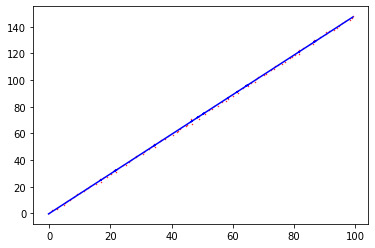

In [66]:
#plt.plot(x, m*x + b, 'r')
print(m)
y_pred = m*x+b
plt.scatter(df.X, df.Y, s=0.2, color='red')
plt.plot(x, y_pred,'b')
plt.show()

In [64]:
def gradient_descent_2(x, y):
    m_curr = b_curr = 0
    iterations = 1000
    n = len(x)
    learning_rate = 0.0001
    #code for mean absolute error loss function
    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([abs(val**3) for val in (y-y_predicted)])
        md = bd = 0
        for j in range(n):
            val = y[j] - y_predicted[j]
            if val > 0:
                md = md -(3/n)*(x[j]*(val**2))
                bd = bd -(3/n)*((val)**2)
            else:
                md = md +(3/n)*(x[j]*(val**2))
                bd = bd +(3/n)*((val)**2)
        md = md/n
        bd = bd/n
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print ("m {}, b {}, cost {} iteration {}".format(m_curr,b_curr,cost, i))
    return m_curr, b_curr

x = df.X
y = df.Y

m , b = gradient_descent_2(x,y)

m 1.6511696972283418, b 0.021927274750752235, cost 825599.9965737567 iteration 0
m 1.6302963841551734, b 0.021648098217252314, cost 1183.3833787923534 iteration 1
m 1.6143018693669713, b 0.02143390395047893, cost 795.8360378971589 iteration 2
m 1.6016041537761079, b 0.021263636760893562, cost 564.5566716692329 iteration 3
m 1.5912508346347596, b 0.021124618653416128, cost 416.9770148075382 iteration 4
m 1.5826303206848227, b 0.021008706345703038, cost 317.89577307983876 iteration 5
m 1.5753300953956249, b 0.02091040591891431, cost 248.65531031568617 iteration 6
m 1.5690609033550753, b 0.020825864379693238, cost 198.67008958705807 iteration 7
m 1.5636134178195251, b 0.020752292714112334, cost 161.6000865539663 iteration 8
m 1.5588321358625614, b 0.020687618498342813, cost 133.476196881565 iteration 9
m 1.5545989561706002, b 0.02063026735756924, cost 111.72014899314696 iteration 10
m 1.5508224680647158, b 0.02057902040555023, cost 94.60385551924992 iteration 11
m 1.547430748020206, b 0.0

m 1.4911476356492868, b 0.01973555811267799, cost 1.3148808881739495 iteration 113
m 1.4910382311381114, b 0.019733873743074972, cost 1.3024891472170461 iteration 114
m 1.4909305908132902, b 0.01973221545100153, cost 1.2904947859583833 iteration 115
m 1.4908246806589727, b 0.019730582746171205, cost 1.2788838253133825 iteration 116
m 1.4907204674750139, b 0.019728975149754063, cost 1.2676428327356473 iteration 117
m 1.4906179188527588, b 0.019727392194043618, cost 1.2567588983405231 iteration 118
m 1.490517003151691, b 0.019725833422135474, cost 1.2462196121920512 iteration 119
m 1.490417689476906, b 0.019724298387617162, cost 1.2360130426902145 iteration 120
m 1.490319947658998, b 0.01972278665430661, cost 1.2261277160099673 iteration 121
m 1.490223748288961, b 0.019721297797270658, cost 1.2165525990697377 iteration 122
m 1.4901290626651496, b 0.019719831401786177, cost 1.2072770889700544 iteration 123
m 1.4900358627437191, b 0.019718387062371334, cost 1.198290986561864 iteration 124


m 1.484432456446538, b 0.019625122609730906, cost 0.911773519051767 iteration 296
m 1.4844258909490191, b 0.01962496628987247, cost 0.9117289350892578 iteration 297
m 1.4844194261170747, b 0.019624811456587458, cost 0.9116857074725742 iteration 298
m 1.4844130604126196, b 0.01962465808713061, cost 0.9116437950040656 iteration 299
m 1.484406792320912, b 0.01962450615910286, cost 0.9116031577343089 iteration 300
m 1.4844006203502038, b 0.01962435565044612, cost 0.91156375692443 iteration 301
m 1.484394543031396, b 0.01962420653943815, cost 0.9115255550095228 iteration 302
m 1.4843885589177, b 0.019624058804687487, cost 0.9114885155632463 iteration 303
m 1.484382666584302, b 0.01962391242512847, cost 0.9114526032634236 iteration 304
m 1.4843768646280353, b 0.019623767380016324, cost 0.9114177838586716 iteration 305
m 1.4843711516670537, b 0.019623623648922315, cost 0.9113840241360585 iteration 306
m 1.4843655263405122, b 0.019623481211728983, cost 0.9113512918897575 iteration 307
m 1.4843

m 1.484086470654915, b 0.01961365913899815, cost 0.9103627564749591 iteration 403
m 1.4840852179206274, b 0.019613581232701464, cost 0.9103611279353316 iteration 404
m 1.48408398445755, b 0.019613503610703034, cost 0.9103595489713439 iteration 405
m 1.4840827699696229, b 0.019613426268634892, cost 0.910358018070997 iteration 406
m 1.4840815741653288, b 0.019613349202196127, cost 0.9103565337683709 iteration 407
m 1.4840803967576237, b 0.019613272407151855, cost 0.910355094642259 iteration 408
m 1.4840792374638678, b 0.01961319587933221, cost 0.9103536993147444 iteration 409
m 1.484078096005759, b 0.01961311961463135, cost 0.9103523464499513 iteration 410
m 1.484076972109265, b 0.019613043609006463, cost 0.91035103475272 iteration 411
m 1.48407586550456, b 0.019612967858476816, cost 0.9103497629673739 iteration 412
m 1.4840747759259587, b 0.019612892359122794, cost 0.9103485298765188 iteration 413
m 1.4840737031118532, b 0.019612817107084974, cost 0.9103473342998826 iteration 414
m 1.48

m 1.4840085784126298, b 0.019600387604833815, cost 0.9103088730153399 iteration 607
m 1.4840085261996927, b 0.019600327414588826, cost 0.910308866535714 iteration 608
m 1.4840084748033988, b 0.019600267236440067, cost 0.9103088601450678 iteration 609
m 1.4840084242111866, b 0.019600207070202304, cost 0.9103088538406853 iteration 610
m 1.4840083744106876, b 0.019600146915693156, cost 0.9103088476199196 iteration 611
m 1.4840083253897234, b 0.01960008677273304, cost 0.9103088414802337 iteration 612
m 1.4840082771363032, b 0.01960002664114514, cost 0.9103088354191472 iteration 613
m 1.4840082296386208, b 0.01959996652075536, cost 0.9103088294342655 iteration 614
m 1.484008182885051, b 0.019599906411392278, cost 0.9103088235232494 iteration 615
m 1.4840081368641482, b 0.019599846312887113, cost 0.9103088176838545 iteration 616
m 1.4840080915646423, b 0.019599786225073676, cost 0.9103088119138921 iteration 617
m 1.4840080469754366, b 0.01959972614778834, cost 0.9103088062112434 iteration 61

m 1.4840056093959841, b 0.019591609617680333, cost 0.910308254524288 iteration 754
m 1.484005604835516, b 0.019591550138066537, cost 0.9103082509293666 iteration 755
m 1.4840056003586748, b 0.019591490659740023, cost 0.9103082473353898 iteration 756
m 1.4840055959641743, b 0.019591431182681817, cost 0.9103082437423248 iteration 757
m 1.4840055916507475, b 0.019591371706873247, cost 0.9103082401501411 iteration 758
m 1.4840055874171476, b 0.019591312232295918, cost 0.910308236558816 iteration 759
m 1.4840055832621464, b 0.019591252758931726, cost 0.9103082329683168 iteration 760
m 1.4840055791845348, b 0.01959119328676284, cost 0.910308229378626 iteration 761
m 1.4840055751831223, b 0.019591133815771704, cost 0.9103082257897179 iteration 762
m 1.4840055712567366, b 0.019591074345941036, cost 0.9103082222015714 iteration 763
m 1.4840055674042238, b 0.019591014877253815, cost 0.9103082186141495 iteration 764
m 1.4840055636244476, b 0.019590955409693286, cost 0.9103082150274461 iteration 7

m 1.4840054212508509, b 0.019582814402048548, cost 0.9103077260792494 iteration 902
m 1.4840054215785097, b 0.019582755002526292, cost 0.9103077225155377 iteration 903
m 1.4840054219145993, b 0.01958269560318249, cost 0.910307718951852 iteration 904
m 1.4840054222589898, b 0.019582636204015232, cost 0.9103077153881708 iteration 905
m 1.4840054226115538, b 0.019582576805022633, cost 0.9103077118245168 iteration 906
m 1.4840054229721655, b 0.01958251740620284, cost 0.910307708260869 iteration 907
m 1.484005423340701, b 0.019582458007554024, cost 0.9103077046972422 iteration 908
m 1.4840054237170384, b 0.01958239860907439, cost 0.910307701133623 iteration 909
m 1.4840054241010576, b 0.01958233921076217, cost 0.9103076975700246 iteration 910
m 1.4840054244926406, b 0.019582279812615615, cost 0.9103076940064379 iteration 911
m 1.484005424891671, b 0.019582220414633016, cost 0.910307690442859 iteration 912
m 1.4840054252980341, b 0.01958216101681268, cost 0.9103076868793082 iteration 913
m 1